### 牛顿法

In [12]:
using Gadfly

In [13]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

In [4]:
function Newton(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=true
        ) 
    
    xk = x0
    fk = f(xk...)
    p=[]
    for i in 1:maxIterations
        # iteration
        d =-inv(h(xk...))*g(xk...)
        α = 1
        δ = α*d
        xn = xk .+ δ
        fn = f(xn...)
        push!(p,xk)
        # convegence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return p
        end
        if debug
            println("i=",i, " α=", α, " xk=", xk, " xn=", xn, " d=", d, " δ= ",δ)
            println("fk=", fk, "\tfn=", fn)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

Newton (generic function with 1 method)

In [26]:
p=
@time Newton(
    (x,y)->x^2+3*x*y+11y^2-x-18y,
    (x,y)->[2*x+3*y-1, 3*x+22*y-18],
    (x,y)->[2 3;
           3 22],
    [1.0,1.0], 

    debug=true
)

i=1 α=1 xk=[1.0, 1.0] xn=[-0.914286, 0.942857] d=[-1.91429, -0.0571429] δ= [-1.91429, -0.0571429]
fk=-4.0	fn=-8.028571428571428
Convergence is reached after 2 iterations.
  0.065951 seconds (143.46 k allocations: 7.709 MiB)


2-element Array{Any,1}:
 [1.0, 1.0]           
 [-0.914286, 0.942857]

In [39]:
data=layer((x,y)->x^2+3*x*y+11y^2-x-18y, -0.5, 2, 0, 2);

In [40]:
New = layer(
    x=[p[i][1] for i in 1:length(p)],
    y=[p[i][2] for i in 1:length(p)],
    label=[string(i) for i in 1:length(p)],
    Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"blue")
);

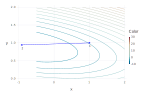

In [42]:
plot(data,New)

### 最速下降法

In [6]:
function steepest_descent(f,g,x0;
       ϵx=0.01, #precision for step size
       ϵf=0.01, 
       ϵg=0.01, 
        maxIterations=10000,
        debug=false)
    
    xk=x0
    fk=f(xk...)
    q=[]
    for i in 1: maxIterations
      
        d=-g(xk...)
        α=search_for_alpha(f,xk,fk,d,-d)
        δ = α*d 
        xn=xk.+δ
        fn=f(xn...)
        q=push!(q,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
             println("Convergence is reached after",i,"iterations.")
        return (q)
        end
        if debug
       println("i=",i, "xk=",xk)
        end
        
    xk=xn
    fk=fn
    end
    println("WARN",maxIterations,"iterations have been exceeded")
end

steepest_descent (generic function with 1 method)

In [7]:
function search_for_alpha(f,xk,fk,d,g;
        α0=100,
        ϵ=0.5,
        τ=0.5,)
    α=α0
    φ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ*α*φ0
       α=τ*α
    end
    return α
end

search_for_alpha (generic function with 1 method)

In [8]:
q=
steepest_descent(
    (x,y)->x^2+3*x*y+11y^2-x-18y,
    (x,y)->[2*x+3*y-1, 3*x+22*y-18],
    [1.0, 1.0],
    debug=true,
)

i=1xk=[1.0, 1.0]
i=2xk=[0.829102, 0.487305]
i=3xk=[0.716616, 0.337602]
i=4xk=[0.541035, 0.259345]
i=5xk=[0.298534, 0.368254]
i=6xk=[0.220535, 0.309332]
i=7xk=[0.119883, 0.375455]
i=8xk=[0.102164, 0.354156]
i=9xk=[0.0461787, 0.332392]
i=10xk=[0.0406106, 0.345929]
i=11xk=[0.0288508, 0.355312]
i=12xk=[0.00832459, 0.351867]
i=13xk=[0.00357737, 0.357861]
i=14xk=[-0.00535517, 0.35485]
i=15xk=[-0.00627736, 0.356809]
i=16xk=[-0.01009, 0.35956]
i=17xk=[-0.0107792, 0.358647]
i=18xk=[-0.0118556, 0.35817]
i=19xk=[-0.013343, 0.358835]
Convergence is reached after20iterations.


20-element Array{Any,1}:
 [1.0, 1.0]             
 [0.829102, 0.487305]   
 [0.716616, 0.337602]   
 [0.541035, 0.259345]   
 [0.298534, 0.368254]   
 [0.220535, 0.309332]   
 [0.119883, 0.375455]   
 [0.102164, 0.354156]   
 [0.0461787, 0.332392]  
 [0.0406106, 0.345929]  
 [0.0288508, 0.355312]  
 [0.00832459, 0.351867] 
 [0.00357737, 0.357861] 
 [-0.00535517, 0.35485] 
 [-0.00627736, 0.356809]
 [-0.01009, 0.35956]    
 [-0.0107792, 0.358647] 
 [-0.0118556, 0.35817]  
 [-0.013343, 0.358835]  
 [-0.0138211, 0.358476] 

In [33]:
data=layer((x,y)->x^2+3*x*y+11y^2-x-18y, -0.5, 2, 0, 2);

In [34]:
SteepestDescent=
layer(
    x=[q[i][1] for i in 1:length(q)],
    y=[q[i][2] for i in 1:length(q)],
    label=[string(i) for i in 1:length(q)],
    Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"red")
);

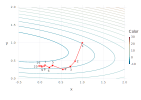

In [43]:
plot(data,SteepestDescent)

### 共轭方向

In [21]:
function ConjugateGradientFSO(f, g, h, x0;
        ϵx=0.01, # precision for step size
        ϵf=0.01,
        ϵg=0.01,
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn,fn,gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [22]:
xn, fn, gn, steps=
ConjugateGradientFSO(
    (x,y)->x^2+3*x*y+11y^2-x-18y,
    (x,y)->[2*x+3*y-1, 3*x+22*y-18],
    [2 3; 3 22],
    [1.0,1.0],
    debug=false
)

Convergence is reached after 2 iterations.


([-0.914286, 0.942857], -8.028571428571428, [0.0, 3.55271e-15], Any[[1.0, 1.0], [0.796557, 0.643975], [-0.914286, 0.942857]])

In [35]:
data=layer((x,y)->x^2+3*x*y+11y^2-x-18y, -0.5, 2, 0, 2);

In [36]:
ConjugateGradient=layer(
x=[steps[i][1] for i in 1:length(steps)],
y=[steps[i][2] for i in 1:length(steps)],
label=[string(i) for i in 1:length(steps)],
Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"yellow"));

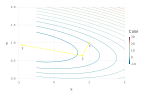

In [44]:
plot(data,ConjugateGradient)

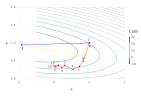

In [41]:
data=layer((x,y)->x^2+3*x*y+11y^2-x-18y, -0.5, 2, 0, 2);
plot(data,New,SteepestDescent,ConjugateGradient)